# EDA

Kernel to use: Python 3.7.3 64-bit (conda). On the bottom left of VSCode it says: Python 3.9.5 64-bit

In [1]:
import warnings
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data/train.csv')
data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [4]:
# Check for missing values
data.isnull().values.any()

False

In [5]:
data.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [6]:
data.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


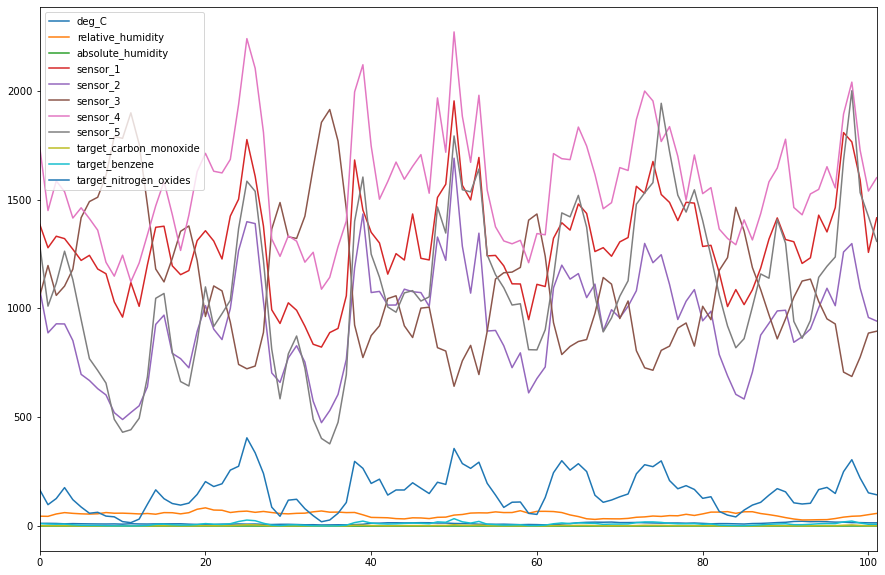

In [7]:
somedays = data[data['date_time'] < '2010-03-15']
somedays.plot(figsize=(15,10))
plt.show()

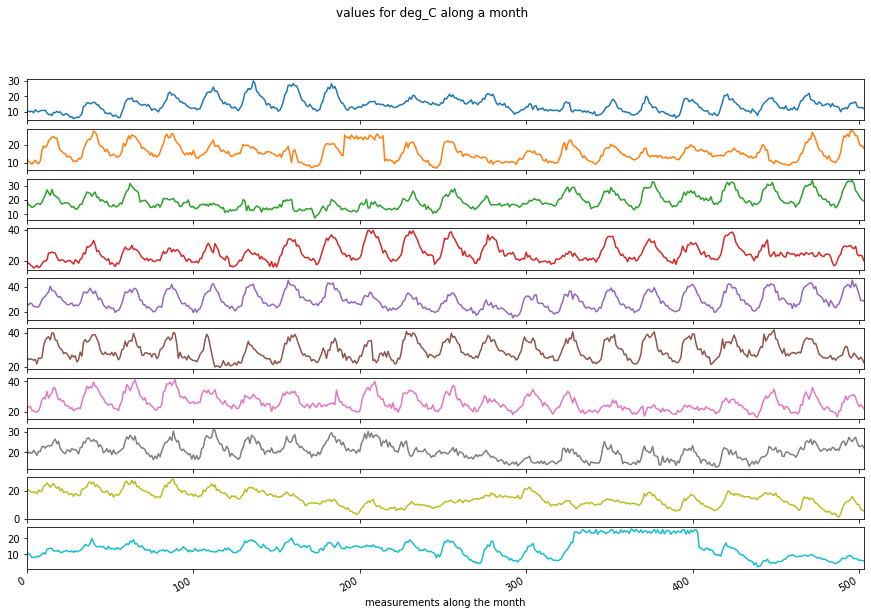

In [8]:
from pandas import Grouper

field_to_show = 'deg_C'

data.date_time = pd.to_datetime(data['date_time'])
single_column_data = data[['date_time', field_to_show]]
single_column_data = single_column_data[(single_column_data['date_time'] >= '2010-03-11') & (single_column_data['date_time'] < '2011-01-01' )]

single_column_data.set_index('date_time')

groups = single_column_data.groupby(Grouper(key='date_time', freq='1M'))

days = pd.DataFrame()
for name, group in groups:
    days[name.date()] = pd.Series(group.values[:,1]) #the pd.Series call solves the problem of months of different lengths

days.plot(subplots=True, legend=False, title = "values for " + field_to_show + " along a month", figsize=(15,10), )
plt.xlabel("measurements along the month")

plt.show()


In [9]:
single_column_data = data[['date_time', 'deg_C']]
single_column_data = single_column_data[(single_column_data['date_time'] >= '2010-03-11')] # & (single_column_data['date_time'] < '2011-01-01' )
single_column_data

,date_time,deg_C
6,2010-03-11 00:00:00,10.7
7,2010-03-11 01:00:00,10.3
8,2010-03-11 02:00:00,10.1
9,2010-03-11 03:00:00,10.5
10,2010-03-11 04:00:00,9.4
...,...,...
7106,2010-12-31 20:00:00,9.2
7107,2010-12-31 21:00:00,9.1
7108,2010-12-31 22:00:00,9.6
7109,2010-12-31 23:00:00,8.0


In [387]:
#profile = ProfileReport(data)
#profile.to_widgets()

# Exploratory Model Training

In [11]:
#https://www.kaggle.com/carlolepelaars/understanding-the-metric-rmsle
def NumPyRMSLE(y_true:list, y_pred:list) -> float:
    """
        The Root Mean Squared Log Error (RMSLE) metric using only NumPy
        N.B. This function is a lot slower than sklearn's implementation
        
        :param y_true: The ground truth labels given in the dataset
        :param y_pred: Our predictions
        :return: The RMSLE score
    """
    n = len(y_true)
    msle = np.mean([(np.log(y_pred[i] + 1) - np.log(y_true[i] + 1)) ** 2.0 for i in range(n)])
    return np.sqrt(msle)

In [12]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn_pandas import DataFrameMapper

class DateFormatter(TransformerMixin):

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xdate = X.apply(pd.to_datetime)
        return Xdate
        
class DateTransformer(TransformerMixin, BaseEstimator):
    """Extracts features from datetime column
    
    Returns:
      hour: hour
      day: Between 1 and the number of days in the month
      month: Between 1 and 12 inclusive.
      year: four-digit year
      weekday: day of the week as an integer. Mon=0 and Sun=6
   """
    def fit(self, x, y=None):
            return self

    def transform(self, x, y=None):
            colname= 'date_time'
            result = pd.DataFrame(x, columns=[colname])
            #result['year'] = [dt.year for dt in result[colname]]
            #result['month'] = [dt.month for dt in result[colname]]
            #result['day'] = [dt.day for dt in result[colname]]
            result['hour'] = [dt.hour for dt in result[colname]]
            result['weekday'] = [dt.weekday() for dt in result[colname]]
            #return result[['hour', 'day', 'month', 'year', 'weekday']]
            return result[['hour', 'weekday']]
        
    def get_feature_names(self):
            #return ['hour', 'day', 'month', 'year', 'weekday']
            return ['hour', 'weekday']

In [39]:
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

# prepare the data
target_columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides' ]
y = data[target_columns]
X = data[data.columns.difference(target_columns)]
X.date_time = X.date_time.astype(str) #EBR's don't support datetimes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

#create pipelines
numerical_columns_selector = selector(dtype_include='float64')
numerical_columns = numerical_columns_selector(X_train)

dates_pipeline = Pipeline([
        ('formatter', DateFormatter()), ('encoder', DateTransformer())
        ])

ct = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), numerical_columns),
        ('date_expansion', dates_pipeline, ['date_time'])
    ]
)

pipeline_cm = make_pipeline(ct, lgb.LGBMRegressor(n_estimators=150, max_depth=20, learning_rate=0.05, random_state=42))
pipeline_benz = make_pipeline(ct, lgb.LGBMRegressor(n_estimators=200, max_depth=20, learning_rate=0.05, random_state=42))
pipeline_no = make_pipeline(ct, lgb.LGBMRegressor(n_estimators=150, max_depth=15, learning_rate=0.05, random_state=42))

#pipeline_cm
#pipeline_cm['columntransformer']

In [43]:
pipeline_cm.fit(X_train, y_train[target_columns[0]]) #[numerical_columns]
print("Trained pipeline_cm")

pipeline_benz.fit(X_train, y_train[target_columns[1]])
print("Trained pipeline_benz")

pipeline_no.fit(X_train, y_train[target_columns[2]])
print("Trained pipeline_no")

Trained pipeline_cm
Trained pipeline_benz
Trained pipeline_no


In [46]:
from sklearn.metrics import mean_squared_log_error
import math

pred_cm = pipeline_cm.predict(X_test) #[numerical_columns]
pred_benz = pipeline_benz.predict(X_test)
pred_no = pipeline_no.predict(X_test)

# https://stackoverflow.com/questions/57839824/how-to-pre-process-the-data-to-calculate-root-mean-squared-logarithmic-error
# this fails if negative predictions < -1.0
error_cm = NumPyRMSLE(y_test[target_columns[0]].tolist(), pred_cm.tolist())   # mean_squared_log_error(y_test[target_columns[0]], pred_cm)
error_benz = NumPyRMSLE(y_test[target_columns[1]].tolist(), pred_benz.tolist())
error_no = NumPyRMSLE(y_test[target_columns[2]].tolist(), pred_no.tolist())

print((error_cm + error_benz + error_no)/3)

0.1778039335316294


In [477]:
# Do some hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {  'lgbmregressor__n_estimators': [100, 150, 200, 250, 300],
                'lgbmregressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
                'lgbmregressor__max_depth': [15, 20, 25, 30],
                #'lgbmregressor__num_leaves': 32,
                #'lgbmregressor__feature_fraction': 0.8,
                #'lgbmregressor__subsample': 0.2
                }

search_cm = RandomizedSearchCV(pipeline_cm, param_distributions=param_dist, cv=5, n_iter=50)
search_cm.fit(X_train[numerical_columns], y_train[target_columns[0]])
print(search_cm.best_params_)
print("search done for cm")

search_benz = RandomizedSearchCV(pipeline_benz, param_distributions=param_dist, cv=5, n_iter=50)
search_benz.fit(X_train[numerical_columns], y_train[target_columns[1]])
print(search_benz.best_params_)
print("search done for benz")

search_no = RandomizedSearchCV(pipeline_no, param_distributions=param_dist, cv=5, n_iter=50)
search_no.fit(X_train[numerical_columns], y_train[target_columns[2]])
print(search_no.best_params_)
print("search done for no")


{'lgbmregressor__n_estimators': 150, 'lgbmregressor__max_depth': 20, 'lgbmregressor__learning_rate': 0.05}
search done for cm
{'lgbmregressor__n_estimators': 200, 'lgbmregressor__max_depth': 20, 'lgbmregressor__learning_rate': 0.05}
search done for benz
{'lgbmregressor__n_estimators': 150, 'lgbmregressor__max_depth': 15, 'lgbmregressor__learning_rate': 0.05}
search done for no


In [483]:
print(search_cm.best_params_)
print(search_benz.best_params_)
print(search_no.best_params_)

# make submission predictions
pred_cm = search_cm.predict(X_test[numerical_columns])
pred_benz = search_benz.predict(X_test[numerical_columns])
pred_no = search_no.predict(X_test[numerical_columns])

# https://stackoverflow.com/questions/57839824/how-to-pre-process-the-data-to-calculate-root-mean-squared-logarithmic-error
# this fails if negative predictions < -1.0

pred_no[pred_no<0] = 0

error_cm = NumPyRMSLE(y_test[target_columns[0]].tolist(), pred_cm.tolist())   # mean_squared_log_error(y_test[target_columns[0]], pred_cm)
error_benz = NumPyRMSLE(y_test[target_columns[1]].tolist(), pred_benz.tolist())
error_no = NumPyRMSLE(y_test[target_columns[2]].tolist(), pred_no.tolist())

print(error_cm + error_benz + error_no)


{'lgbmregressor__n_estimators': 150, 'lgbmregressor__max_depth': 20, 'lgbmregressor__learning_rate': 0.05}
{'lgbmregressor__n_estimators': 200, 'lgbmregressor__max_depth': 20, 'lgbmregressor__learning_rate': 0.05}
{'lgbmregressor__n_estimators': 150, 'lgbmregressor__max_depth': 15, 'lgbmregressor__learning_rate': 0.05}
0.5733702161449773


# Score holdout file for submission

In [47]:
test_data = pd.read_csv('data/test.csv')

In [49]:
# make submission predictions
#test_data.date_time = test_data.date_time.astype(str) #EBR's don't support datetimes

holdout_pred_cm = pipeline_cm.predict(test_data) #[numerical_columns]
holdout_pred_benz = pipeline_benz.predict(test_data)
holdout_pred_no = pipeline_no.predict(test_data)

#holdout_pred_cm = search_cm.predict(test_data) #[numerical_columns]
#holdout_pred_benz = search_benz.predict(test_data)
#holdout_pred_no = search_no.predict(test_data)

#print(holdout_pred_cm[holdout_pred_cm], holdout_pred_benz[holdout_pred_benz], holdout_pred_no[holdout_pred_no]) 

In [52]:
test_data['target_carbon_monoxide'] = holdout_pred_cm
test_data['target_benzene'] = holdout_pred_benz
test_data['target_nitrogen_oxides'] = holdout_pred_no
data_to_save = test_data.drop(numerical_columns, axis=1)


In [53]:
data_to_save.reset_index()
data_to_save.to_csv('data/holdout_predictions.csv', index=False)

In [412]:
test_data

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.567664,5.343316,137.366253
1,2011-01-01 01:00:00,1.992251,7.776310,180.174751
2,2011-01-01 02:00:00,1.739655,7.628417,147.033811
3,2011-01-01 03:00:00,2.047611,8.260546,128.129324
4,2011-01-01 04:00:00,1.198673,6.693413,86.396422
...,...,...,...,...
2242,2011-04-04 10:00:00,2.404019,12.807114,283.343939
2243,2011-04-04 11:00:00,2.136175,10.371779,163.663359
2244,2011-04-04 12:00:00,2.317877,12.415005,173.057239
2245,2011-04-04 13:00:00,2.040592,10.828433,126.191930


In [418]:
pipeline_cm.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('date_expansion',
                                    Pipeline(memory=None,
                                             steps=[('formatter',
                                                     <__main__.DateFormatter object at 0x000001B9742D3F98>),
                                                    ('encoder',
                                                     DateTransformer())],
                                             verbose=False),
                                    ['date_time']),
                                   ('scaler',
                                    MinMaxScaler(copy=True, feature_range=(0, 1)),
                                    ['absolute_humidity', 'deg_C',
                                     'relative_humidity', 'sensor_1', 'sensor_2',
             

In [430]:
search_cm

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('date_expansion',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('formatter',
                                                                                                <__main__.DateFormatter object at 0x000001B9742D3F98>),
                                           